In [ ]:
!pip install seaborn scikit-learn pandas matplotlib

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

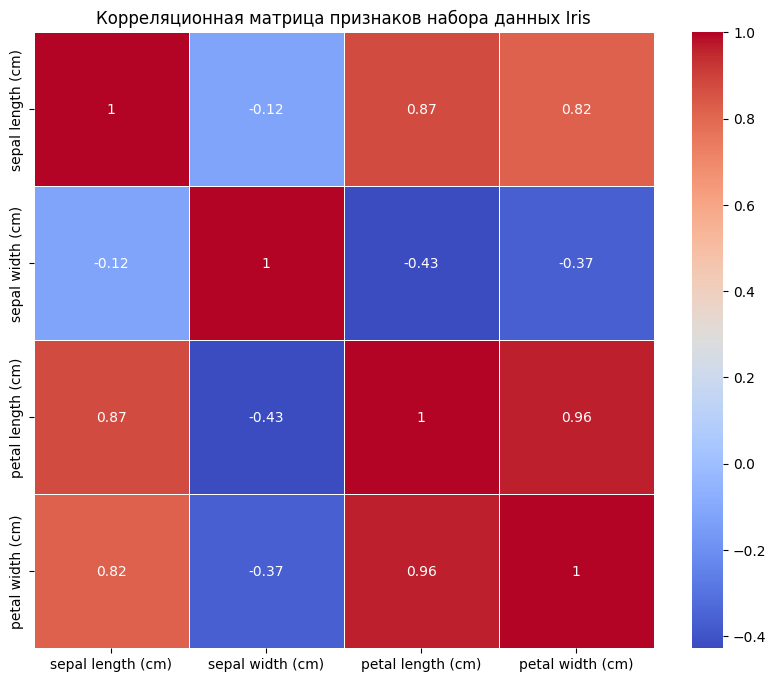

In [ ]:
# Задание 1: Работа с корреляционной матрицей
# Используйте набор данных "Iris" из sklearn.datasets. Вычислите корреляционную матрицу числовых признаков.
# Затем визуализируйте эту матрицу с помощью heatmap в библиотеке seaborn.

# Загрузка данных
iris = load_iris()
data_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Вычисление корреляционной матрицы
corr_matrix_iris = data_iris.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_iris, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица признаков набора данных Iris')
plt.show()

In [ ]:
# Задание 2: Исключение мультиколлинеарных признаков
# Используйте набор данных "Wine" из sklearn.datasets. Вычислите корреляционную матрицу,
# а затем найдите и исключите признаки, у которых корреляция друг с другом превышает заданный порог.

# Загрузка данных
wine = load_wine()
data_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

# Вычисление корреляционной матрицы
corr_matrix_wine = data_wine.corr()

# Задание порога корреляции
threshold = 0.9

# Нахождение пар признаков с высокой корреляцией
high_corr_var = np.where(corr_matrix_wine > threshold)
high_corr_var = [(corr_matrix_wine.columns[x], corr_matrix_wine.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# Исключение одного из признаков в каждой паре
to_drop = [col for col_pair in high_corr_var for col in col_pair[1:]]
data_reduced_wine = data_wine.drop(columns=to_drop)

print("Dropped columns:", to_drop)
print("Reduced dataset shape:", data_reduced_wine.shape)

Dropped columns: []
Reduced dataset shape: (178, 13)


In [ ]:
# Задание 3: Выбор наиболее значимых признаков
# Используйте набор данных "California Housing" из sklearn.datasets. Вычислите коэффициенты корреляции
# между каждым признаком и целевой переменной, затем выберите n признаков с наибольшим абсолютным значением коэффициента.

# Загрузка данных
california = fetch_california_housing()
data_california = pd.DataFrame(california.data, columns=california.feature_names)
target_california = pd.Series(california.target, name='target')

# Вычисление коэффициентов корреляции
corr_with_target_california = data_california.apply(lambda x: x.corr(target_california))

# Выбор n признаков с наибольшим абсолютным значением коэффициента
n = 5
top_features_california = corr_with_target_california.abs().nlargest(n).index
data_selected_california = data_california[top_features_california]

print("Top features:", top_features_california)
print("Selected dataset shape:", data_selected_california.shape)

# Визуализация корреляции
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features_california, y=corr_with_target_california[top_features_california].values)
plt.title('Наиболее значимые признаки по корреляции')
plt.xticks(rotation=45)
plt.show()

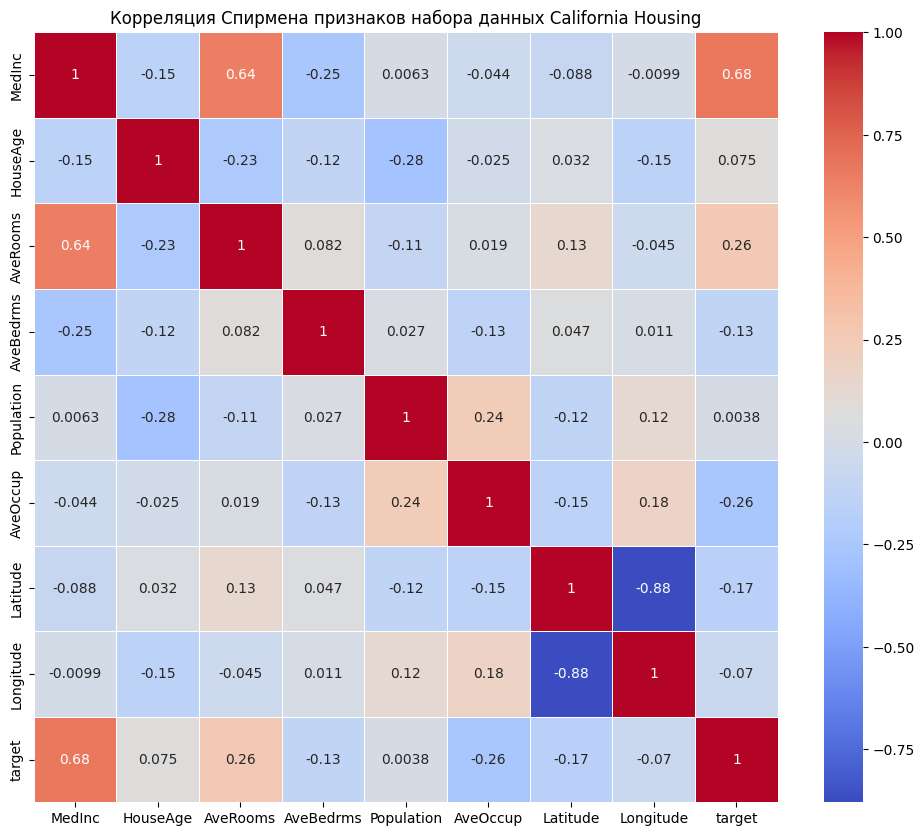

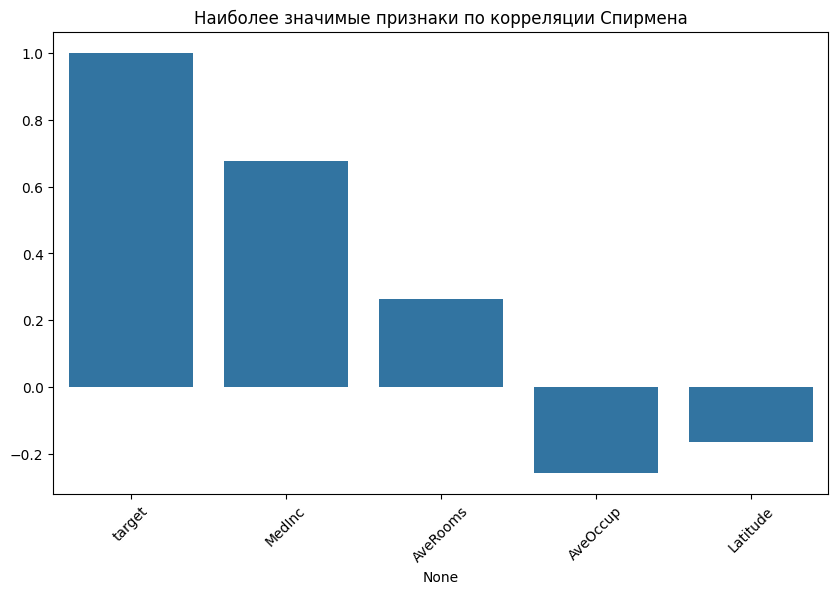

In [ ]:
# Задание 4: Применение Ранговой корреляции Спирмена
# Используйте любой набор данных, имеющий порядковые признаки. Примените корреляцию Спирмена для выбора наиболее значимых признаков.

california = fetch_california_housing()
data_california = pd.DataFrame(california.data, columns=california.feature_names)

data_spearman = data_california.copy()
data_spearman['target'] = target_california

# Преобразование категориальных признаков в числовые (если есть)

# Выбор только числовых признаков после кодирования
numeric_features_encoded = data_spearman.select_dtypes(include=['int64', 'float64']).columns
data_numeric_encoded = data_spearman[numeric_features_encoded]

# Вычисление корреляции Спирмена
corr_spearman_encoded = data_numeric_encoded.corr(method='spearman')

# Визуализация корреляции Спирмена
plt.figure(figsize=(12, 10))
sns.heatmap(corr_spearman_encoded, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляция Спирмена признаков набора данных California Housing')
plt.show()

# Выбор n признаков с наибольшим абсолютным значением коэффициента
n = 5
top_features_spearman = corr_spearman_encoded['target'].abs().nlargest(n).index
data_selected_spearman = data_numeric_encoded[top_features_spearman]

# Визуализация выбранных признаков
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features_spearman, y=corr_spearman_encoded['target'][top_features_spearman].values)
plt.title('Наиболее значимые признаки по корреляции Спирмена')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Задание 5: Сравнение методов отбора признаков
# Используйте один и тот же набор данных для применения различных методов отбора признаков,
# включая корреляционные методы, и сравните результаты.

# Загрузка данных
wine = load_wine()
data_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
target_wine = pd.Series(wine.target, name='target')

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data_wine, target_wine, test_size=0.2, random_state=42)

# Вычисление коэффициентов корреляции
correlations_wine = data_wine.apply(lambda x: x.corr(target_wine))

# Выбор n признаков с наибольшим абсолютным значением коэффициента
n = 5
top_features_corr_wine = correlations_wine.abs().nlargest(n).index

# Применение отбора признаков к обучающим и тестовым данным
X_train_corr = X_train[top_features_corr_wine]
X_test_corr = X_test[top_features_corr_wine]

# Применение SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)

# Обучение модели и оценка производительности
model = RandomForestClassifier(random_state=42)

# Корреляционный отбор признаков
model.fit(X_train_corr, y_train)
y_pred_corr = model.predict(X_test_corr)
accuracy_corr = accuracy_score(y_test, y_pred_corr)

# SelectKBest
model.fit(X_train_kbest, y_train)
y_pred_kbest = model.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)

print("Точность с использованием корреляционного отбора признаков:", accuracy_corr)
print("Точность с использованием метода выбор лучших k признаков для отбора признаков:", accuracy_kbest)

Точность с использованием корреляционного отбора признаков: 0.9166666666666666
Точность с использованием метода выбор лучших k признаков для отбора признаков: 0.9722222222222222


Корреляции с использованием стандартного скалера:
MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
dtype: float64
Корреляции с использованием минимаксного скалера:
MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
dtype: float64
Корреляции с использованием преобразователя мощности:
MedInc        0.659644
HouseAge      0.101790
AveRooms      0.243095
AveBedrms    -0.085920
Population   -0.025152
AveOccup     -0.270553
Latitude     -0.122682
Longitude    -0.047609
dtype: float64


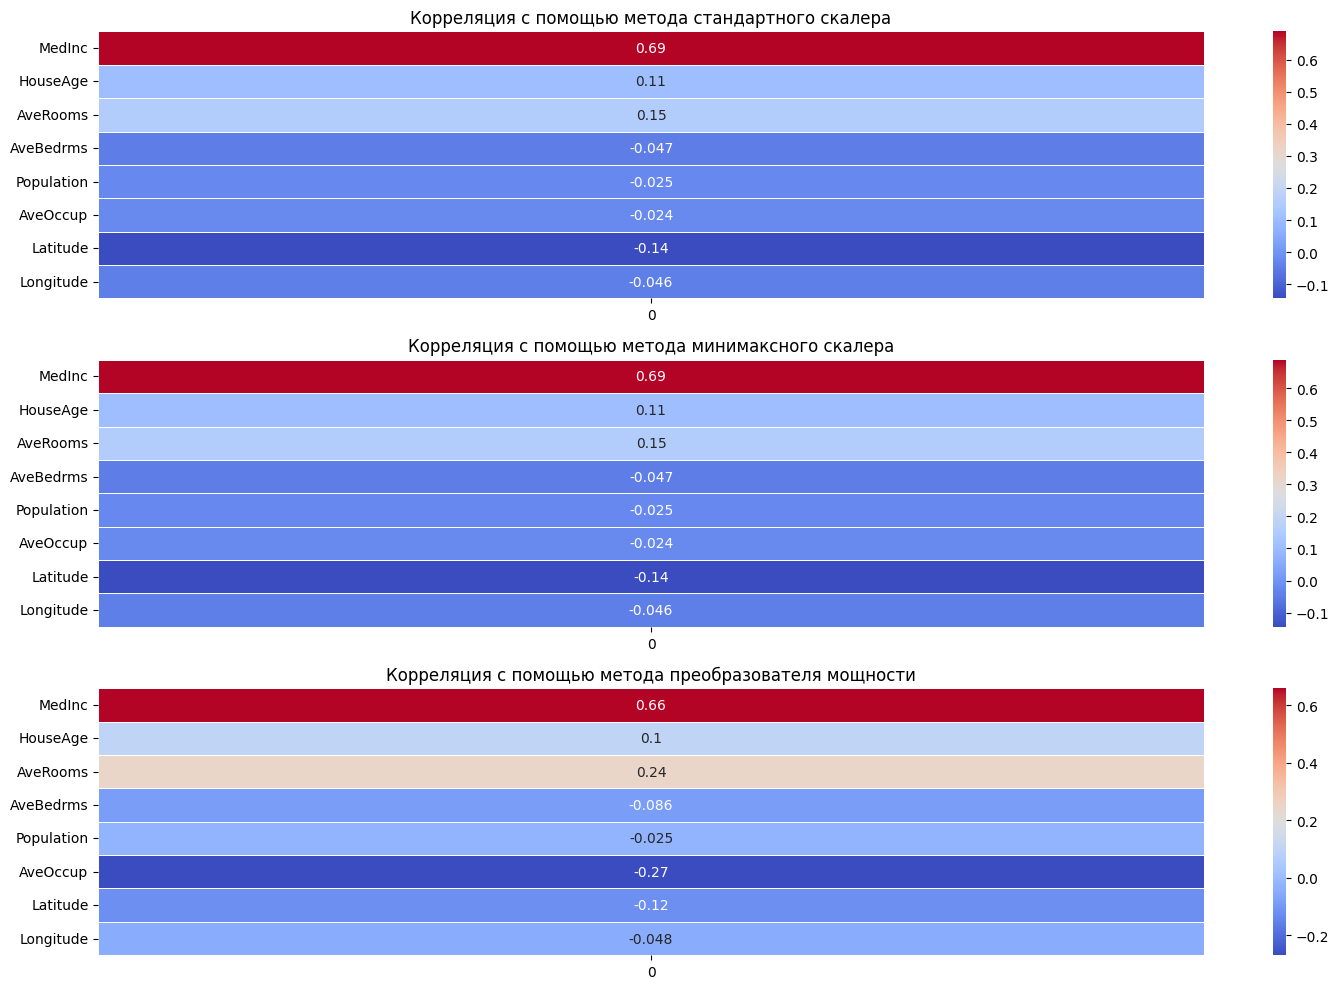

In [ ]:
# Задание 6: Исследование влияния предобработки данных на результаты корреляционного анализа
# Примените различные методы предобработки (например, нормализацию, стандартизацию, логарифмирование)
# к данным перед вычислением корреляции и сравните полученные результаты.

# Загрузка данных
california = fetch_california_housing()
data_california = pd.DataFrame(california.data, columns=california.feature_names)
target_california = pd.Series(california.target, name='target')

# Применение StandardScaler
scaler = StandardScaler()
data_scaled_standard = scaler.fit_transform(data_california)
data_scaled_standard = pd.DataFrame(data_scaled_standard, columns=data_california.columns)

# Вычисление корреляции
correlations_standard = data_scaled_standard.apply(lambda x: x.corr(target_california))
print("Корреляции с использованием стандартного скалера:")
print(correlations_standard)

# Применение MinMaxScaler
scaler = MinMaxScaler()
data_scaled_minmax = scaler.fit_transform(data_california)
data_scaled_minmax = pd.DataFrame(data_scaled_minmax, columns=data_california.columns)

# Вычисление корреляции
correlations_minmax = data_scaled_minmax.apply(lambda x: x.corr(target_california))
print("Корреляции с использованием минимаксного скалера:")
print(correlations_minmax)

# Применение PowerTransformer
scaler = PowerTransformer()
data_scaled_power = scaler.fit_transform(data_california)
data_scaled_power = pd.DataFrame(data_scaled_power, columns=data_california.columns)

# Вычисление корреляции
correlations_power = data_scaled_power.apply(lambda x: x.corr(target_california))
print("Корреляции с использованием преобразователя мощности:")
print(correlations_power)

# Сравнение результатов
methods = ['стандартного скалера', 'минимаксного скалера', 'преобразователя мощности']
correlations = [correlations_standard, correlations_minmax, correlations_power]

plt.figure(figsize=(15, 10))
for i, method in enumerate(methods):
    plt.subplot(3, 1, i+1)
    sns.heatmap(correlations[i].to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Корреляция с помощью метода {method}')
plt.tight_layout()
plt.show()
